<a href="https://colab.research.google.com/github/MatheusB2002/Analise-Incendios-Florestais/blob/main/An%C3%A1liseInc%C3%AAndio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'gold' c> Este Notebook é Dedicado à análise dos Incendios Florestais no Brasil.</font>

#<Font color= Gold> Introduzindo a Visualização do Dataset </font>
##<font size = 2>Começarei com a importação das **bibliotecas** necessárias e também do **Dataset** que será utilizado aqui.Ao final da pesquisa, será divulgada as versões das bibliotecas que aqui forem utilizadas.</font>



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

<font size= 2>Para a importação do Dataset pedido decidi colocá-lo em um repositório do GitHub para que haja segurança de que o código de importaçao do Csv irá funcionar perfeitamente para qualquer pessoa que rodar ele.</font>

<font size = 2, color = Gold>Importando o Dataset de Incêndios Florestais:</font>


In [ ]:
incendios = pd.read_csv('https://raw.githubusercontent.com/MatheusB2002/Analise-Incendios-Florestais/main/amazon.csv',encoding = 'latin1')

incendios.sample(10)

,year,state,month,number,date
1502,2005,Distrito Federal,Abril,0.000,2005-01-01
3976,2009,Pernambuco,Agosto,10.000,2009-01-01
3284,2014,Pará,Setembro,6.787,2014-01-01
329,2007,Alagoas,Maio,0.000,2007-01-01
6446,2009,Tocantins,Dezembro,46.000,2009-01-01
4949,2006,Rio,Setembro,444.000,2006-01-01
4786,2003,Rio,Janeiro,58.000,2003-01-01
5268,2007,Roraima,Janeiro,194.000,2007-01-01
4478,2013,Rio,Setembro,117.000,2013-01-01
907,2007,Amazonas,Outubro,215.000,2007-01-01



<font size = 2> Na primeira visualização aleatória passada pela função "*Sample*" identifiquei a necessidade de fazer uma tradução para melhor visualização já que os valores das colunas "state" e "month" estão em **PT-BR**.

<font size = 2>
Utilizei o método  "*rename*" do *pandas* para fazer essa mudança e descrevi o nome anterior e a substituição utilizando o dicionário do *Python* como parâmetro do método.

In [ ]:
incendios = incendios.rename(columns={
    "year": "Ano",
    "state": "Estado",
    "month": "Mês",
    "number": "Número",
    "date" : "Data"
}
)

<font size = 2>Logo após eu queria saber se os valores tinham algum erro para que pudesse reparar. Numerarei para que fique mais fácil de identificar erros em contagens ou algo do tipo.

In [ ]:
Anos = incendios['Ano'].unique()
for i,Ano in enumerate(Anos, start=1):
  print(f'{i} - {Ano}')

1 - 1998
2 - 1999
3 - 2000
4 - 2001
5 - 2002
6 - 2003
7 - 2004
8 - 2005
9 - 2006
10 - 2007
11 - 2008
12 - 2009
13 - 2010
14 - 2011
15 - 2012
16 - 2013
17 - 2014
18 - 2015
19 - 2016
20 - 2017


In [ ]:
Estados = (incendios['Estado'].unique())

for i,Estado in enumerate(Estados, start=1):
  print(f'{i} - "{Estado}"')

1 - "Acre"
2 - "Alagoas"
3 - "Amapa"
4 - "Amazonas"
5 - "Bahia"
6 - "Ceara"
7 - "Distrito Federal"
8 - "Espirito Santo"
9 - "Goias"
10 - "Maranhao"
11 - "Mato Grosso"
12 - "Minas Gerais"
13 - "Pará"
14 - "Paraiba"
15 - "Pernambuco"
16 - "Piau"
17 - "Rio"
18 - "Rondonia"
19 - "Roraima"
20 - "Santa Catarina"
21 - "Sao Paulo"
22 - "Sergipe"
23 - "Tocantins"



<font size = 2> Para realizar essa visualização pegamos os valores distintos existentes em cada coluna aplicada. Iterando a variável com os valores distintos e printando numericamente.

<font size = 2>O que podemos observar foi que a Coluna de Anos tem todos os seus valores colocados de forma correta. 
A coluna de Estados há erros de grafia tanto faltando caractere, tanto erro de acentuação além de não termos dados coletados de 4 Estados.                   

<font size = 2>As aspas são colocadas para identificar possíveis espaços antes ou depois das strings dos estados.


---
#<font color = Gold> Iniciando limpeza e adaptações:

In [ ]:
incendios['Estado'] = (incendios['Estado'].replace(['Piau', 'Rio','Sao Paulo','Rondonia','Paraiba','Maranhao','Goias','Espirito Santo','Ceara','Amapa'],
                                                   ['Piauí', 'Rio de Janeiro','São Paulo','Rondônia','Paraíba','Maranhão','Goiás','Espírito Santo','Ceará','Amapá']))

<font size = 2> Utilizarei o método "*info*" do *pandas* para que ele me dê uma descrição do documento em análise e o método "describe" para que ajude a entender a distribuição dos dados numéricos. 

In [ ]:
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ano     6454 non-null   int64  
 1   Estado  6454 non-null   object 
 2   Mês     6454 non-null   object 
 3   Número  6454 non-null   float64
 4   Data    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
incendios.describe()

,Ano,Número
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


#<font color = Gold> Informações observadas na descrição do Csv:</font>

1. Todas as colunas estão no formato correto, não será necessário fazer alterações;</font>

2. Existem 6454 linhas (0 ao 6453) e 5 colunas com todas as suas linhas preenchidas (nenhuma linha vazia ou valor inválido);</font>

3. Como são dados de um país com uma grande diversidade em todos os sentidos, é possivel enxergar que há outiliers só pela distribuição;</font>

4. O desvio padrão do Número de incêncendios demonstra uma má distribuição dos dados, mas acho que isso é explicado pela questão da diversidade. O Brasil é grande o suficiente para que exista interações naturais diferentes dependendo da região, tendo áreas com diferentes biomas;
</font>

5. A distribuição dos anos está bem feita, significando que não há anos em que nao houve registros.



---
#  <Font size = 3> Para melhor visualizar essa distribuição dos Números de Incêndios Florestais, utilizarei o "*boxplot*" do *Seaborn* e junto usarei o *Matplotlib* para ajustes:



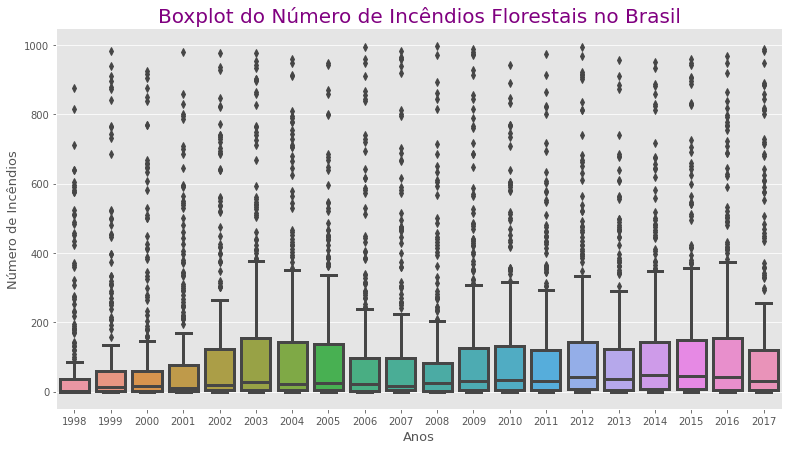

In [ ]:

plt.figure(figsize =(13, 7))
sns.boxplot( x = 'Ano', y = 'Número',data = incendios, linewidth = 3)

plt.title("Boxplot do Número de Incêndios Florestais no Brasil", loc="center", fontsize=20, color= 'Purple')
plt.ylabel("Número de Incêndios",fontsize=13)
plt.xlabel("Anos",fontsize=13)

plt.show();

#<Font color = "Gold"> O que pode ser concluido com a visualização do boxplot?</font>

Em todos os anos há outliers, afirmando assim que há uma diversidade enorme no País. 

A mediana se encontra muito baixa, significando que metade do pais teve valores baixos de Incêndios e a outra metade possui lugares que alcançam 998 queimadas registradas num mês.

É possível concluir que é mais plausível permanecer com todos os dados ao disperdissá-los ou normalizá-los criando assim uma oportunidade de melhores visualizações onde poderemos identificar exatamente os lugares que estão tendo esses valores absurdos de incêndios identificados.





# <font color = Gold>Criação de colunas para auxílio nas análises:</font> 💡

<font color = gold>Representação e descrição de colunas</font>

<font size = 2>Deixarei essa reprentação para se surgir ideias de acréscimo de colunas adicionar aqui: </font>


| Coluna       | <font color = Gold>Descrição </font>                    |
|  ---         |                       ---                               | 
| Estado       | Lugar onde foi computado o incêndio Florestal           |
| Mês          | Mês em que o incêndio Florestal foi computado           |
| Número       | Quantidade de incêndios Florestais computados           |
| Data         | Data Exata em que foi computado o incêndio Florestal    |
| Região       | Separaçao dos estados por região                        |
| Estado_Sigla | Abreviação do nome do Estado                            |
| Bioma_1      | Colocaremos o primeiro Bioma do Estado                  |
| Bioma_2      | Colocaremos o segundo Bioma do Estado (caso ele Possua) |
| Bioma_3      | Colocaremos o segundo Bioma do Estado (caso ele Possua) |



---

<font size = 2>Começaremos excluindo a coluna de "*Data*" já que existem outras duas colunas que conseguem substituir ela facilmente, as colunas "*Mês*" e a coluna "*Ano*" que são mais viáveis a utilização delas do que as de "*Data*" já que poderemos fazer filtros com os Anos que se passaram.</font>

In [ ]:
incendios.drop('Data', axis= 1, inplace = True)

incendios.sample(5)

,Ano,Estado,Mês,Número
3422,2013,Paraíba,Abril,6.0
4638,2014,Rio de Janeiro,Maio,2.0
6082,2004,Sergipe,Junho,0.0
1464,2007,Distrito Federal,Fevereiro,0.0
5935,2016,São Paulo,Outubro,177.0


<font size = 2> Tudo nos conformes, coluna que representava a data de contagem agora foi dropada com o método "*Drop*" do Pandas. </font>



---



<font size = 2>
Agora vamos criar a coluna " Região " para futuramente usar no dashboard, é uma coluna muito interessante para criar vizualizações.

#<font color = Gold> Criando Coluna "Região":

In [ ]:
dicionarioRegioes = {
'Nordeste' : ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Sergipe'],
'Norte' : ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
'Sudeste' : ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
'Sul' : ['Santa Catarina'],
'Centro-Oeste' : ['Distrito Federal', 'Goiás', 'Mato Grosso'],

}

incendios['Região'] = incendios['Estado'].apply( 
    lambda x :[chave for id, chave in enumerate(dicionarioRegioes) if x in dicionarioRegioes[chave]][0]
    )

<font size = 2> Coluna adicionada com sucesso! Para realizar essa tarefa, construi um dicionário onde as chaves são os nomes das regiões e os valores são os nomes de cada estado.

<font size = 2>Após a conclusão do dicionário, criei a coluna "*Região*" colocando dentro dela os nomes das chaves em que os estádos batiam com os valores dentro dessas chaves. Para essa iteração, foi utilizado uma função *lambda* no "*apply*" e *List Comprehension*. Com a lista formada, pegamos a string atravez de seu índice.

<font size = 2>Para confirmarmos que ocorreu tudo da forma que queremos utilizarei a função "*Sample*" para vizualizarmos linhas aleatórias do arquivo:

In [ ]:
incendios.sample(10)

,Ano,Estado,Mês,Número,Região
4146,2000,Piauí,Maio,25.000,Nordeste
1221,2003,Ceará,Fevereiro,9.000,Nordeste
3802,2014,Paraíba,Novembro,68.000,Nordeste
356,2014,Alagoas,Junho,2.000,Nordeste
5724,2004,Santa Catarina,Dezembro,68.000,Sul
3343,2013,Pará,Dezembro,5.514,Norte
3124,2014,Pará,Janeiro,251.000,Norte
1897,2001,Espírito Santo,Dezembro,1.000,Sudeste
1338,2000,Ceará,Agosto,79.000,Nordeste
2751,1999,Mato Grosso,Julho,1.297,Centro-Oeste


<font size = 2> Pode-se observar que os valores foram adicionados da forma correta, agora podemos filtrar os estados por região. Isso é ótimo para criar gráficos de mapas, treemaps além de várias outras possibilidades nos filtros. 
Com a coluna adicionada podemos prosseguir com as análises.


---


<font size = 2>
De acordo com a minha experiência com o Power BI, a plataforma tem uma dificuldade de reconhecer os estados pelos nomes, ainda mais quando existem estados que começam com o mesmo nome, por exemplo:

<font size= 2, color = Gold> Mato Grosso </font ><font size = 3>≃ <font size= 2, color = Gold> Mato Grosso do Sul</font >

<font size= 2, color = Gold> Rio Grande do Sul </font ><font size = 3>≃ <font size= 2, color = Gold> Rio Grande do Norte</font >

<font size = 2> Para resolver isso, seria legal criar uma coluna com a sigla dos Estados, pois assim, a plataforma reconhecerá mais facilmente.



#<font color = Gold> Criando Coluna "Estado_Sigla":

In [ ]:
dicionarioSiglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
  }

incendios['Estado_Sigla'] = incendios['Estado'].apply(
    lambda Estado: [dicionarioSiglas[chave] for id, chave in enumerate(dicionarioSiglas) if Estado == chave][0])

incendios.sample(10)


,Ano,Estado,Mês,Número,Região,Estado_Sigla
1061,2002,Bahia,Junho,118.0,Nordeste,BA
4982,1999,Rio de Janeiro,Novembro,103.0,Sudeste,RJ
2810,1998,Mato Grosso,Outubro,576.0,Centro-Oeste,MT
3576,2007,Paraíba,Dezembro,133.0,Nordeste,PB
1013,2014,Bahia,Março,148.0,Nordeste,BA
5961,2002,São Paulo,Dezembro,57.0,Sudeste,SP
274,2012,Alagoas,Fevereiro,41.0,Nordeste,AL
5501,2001,Santa Catarina,Janeiro,11.0,Sul,SC
2614,2001,Mato Grosso,Dezembro,37.0,Centro-Oeste,MT
270,2008,Alagoas,Fevereiro,74.0,Nordeste,AL


<font size = 2> Para obtermos essa coluna foi usada a mesma estratégia de criação das demais.
Primeiramente foi criado um dicionário sendo a chave desse dicionário o nome do Estado, o valor da chave é a sigla desse Estado. Usando o "*apply*" inserindo um *List Comprehension* dentro de uma função *lambda* conferindo se o Estado tem o mesmo nome da chave, se sim, resgata o valor da chave e adiciona à lista. Ao final de tudo a string é resgatada atravez de seu índice


---
<font size = 2> Após criarmos todas as colunas desejadas, vamos conferir como está o estado de todo o dataset com as mudanças. Faremos isso usando o método "*Info*".


In [ ]:

# Trocando a ordem das colunas para melhor organização:
incendios = incendios[['Ano',
                       'Estado',
                       'Mês',
                       'Número',
                       'Região']
                      
      ]

incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ano     6454 non-null   int64  
 1   Estado  6454 non-null   object 
 2   Mês     6454 non-null   object 
 3   Número  6454 non-null   float64
 4   Região  6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


<font size = 2> Tudo nos conformes, todas as linhas do arquivo foram preenchidas corretamente e todas as Siglas estão dentro do dataframe. Uma observação a se fazer é que o uso da memória quase dobrou com as adições feitas, afinal, acrescentamos colunas suficientes para fazer uma boa pesquisa de Incêndios Florestais.
Com tudo caminhando devidamente, prosseguirei agora com a análise dos dados que esse arquivo pode oferecer da forma que foi organizado.

#<font color = gold> Iniciando as Análises:

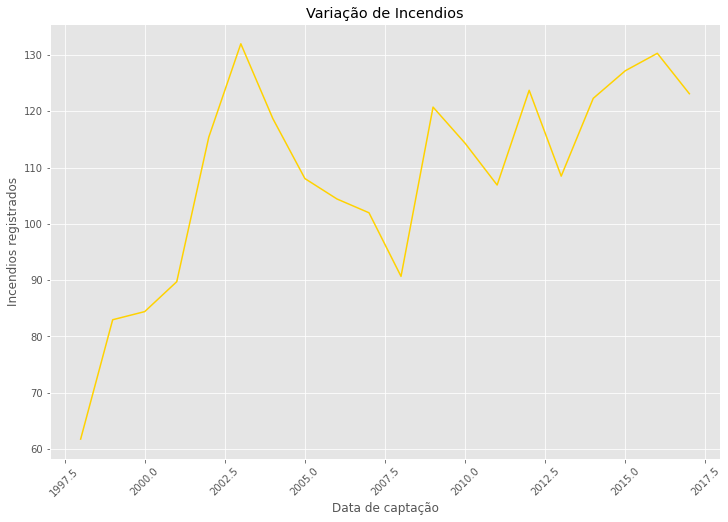

In [ ]:
# Plot com matplotlib básico
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(incendios['Número'].groupby(incendios['Ano']).mean(), color ='#ffd200')
plt.title('Variação de Incendios')
plt.ylabel('Incendios registrados')
plt.xlabel('Data de captação')
plt.xticks(rotation=45)
plt.show()

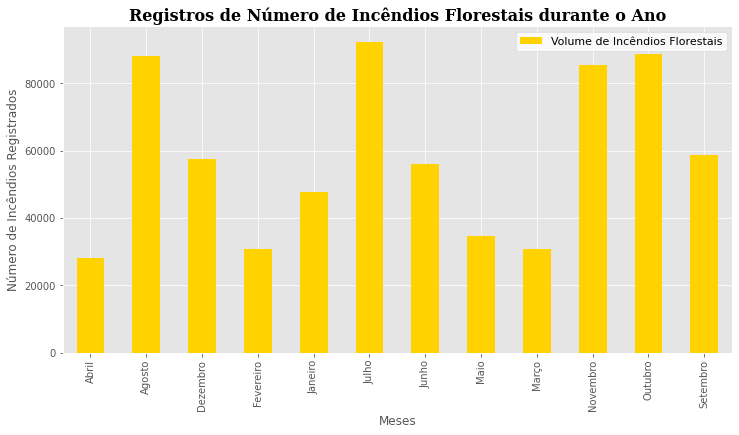

In [ ]:
# Plot com matplotlib 

plt.style.use('ggplot')
graficoNumeroMeses = (incendios['Número'].groupby(incendios['Mês']).sum()).plot(figsize=(12,6),kind='bar', color='#ffd200',label='Volume de Incêndios Florestais')
graficoNumeroMeses.set_title('Registros de Número de Incêndios Florestais durante o Ano', fontsize=16, fontweight='bold', fontfamily='serif' )
plt.ylabel('Número de Incêndios Registrados')
plt.xlabel('Meses')
plt.legend(fontsize=11, facecolor='white')
plt.show()

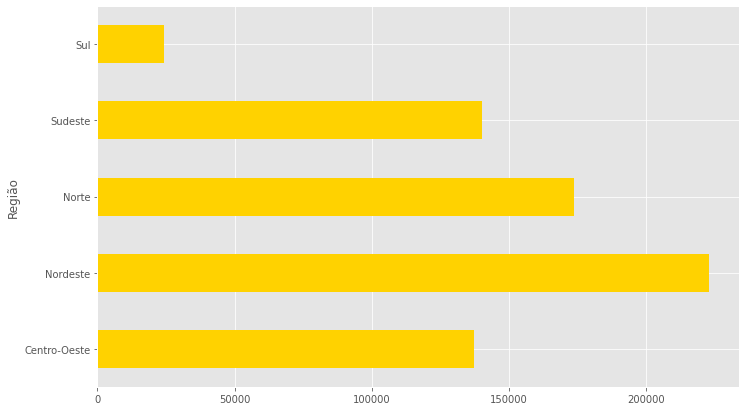

In [ ]:
fig = plt.subplots(figsize=(11.5,7))
ax = incendios['Número'].groupby(incendios['Região']).sum().plot.barh(color = '#ffd200');

In [ ]:
incendios.to_csv('incendios_florestais.csv')

files.download('incendios_florestais.csv')